# COE 379L Software Engineering Design Project 1

## Part 1: Exploratory Data Analysis


In [753]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


In [754]:
### 1. Identify shape, size of the raw data

In [755]:
#Load Dataset
animals = pd.read_csv('project1.csv')

In [756]:
# Display first few rows of data 
animals.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


In [757]:
#viewing the shape of the dataset
animals.shape

(131165, 12)

In [758]:
#viewing size and types for each 
animals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131165 non-null  object
 1   Date of Birth     131165 non-null  object
 2   Name              93658 non-null   object
 3   DateTime          131165 non-null  object
 4   MonthYear         131165 non-null  object
 5   Outcome Type      131125 non-null  object
 6   Outcome Subtype   65810 non-null   object
 7   Animal Type       131165 non-null  object
 8   Sex upon Outcome  131165 non-null  object
 9   Age upon Outcome  131165 non-null  object
 10  Breed             131165 non-null  object
 11  Color             131165 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


### 2. Get information about datatypes. Comment if any of the variables need datatype conversion. Check for duplicate rows and treat them.

In [759]:
#I noticed that every columns type right now is an object so it must be converted 
#to the approprate types:
print("Data types that need to be converted:")
print("Date of Birth, DateTime and MonthYear should be datetime64")
print("Age upon Outcome should be a numeric value (days)")
print("Categorical Variables (Outcome Type, Outcome Subtype, Animal Type, Sex upon Outcome, Breed, Color) need to be encoded")



Data types that need to be converted:
Date of Birth, DateTime and MonthYear should be datetime64
Age upon Outcome should be a numeric value (days)
Categorical Variables (Outcome Type, Outcome Subtype, Animal Type, Sex upon Outcome, Breed, Color) need to be encoded


In [760]:

#counts all duplicate rows.
duplicates = animals.duplicated().sum()
duplicates

17

In [761]:
# droping duplicates
animals = animals.drop_duplicates()

### 3. Identify missing data and/or invalid values and treat them with suitable mean, median, mode or other method

In [762]:
# To treat invalid name data we want to replace the Nan with "unknown"
animals.info()
animals.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 131148 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131148 non-null  object
 1   Date of Birth     131148 non-null  object
 2   Name              93645 non-null   object
 3   DateTime          131148 non-null  object
 4   MonthYear         131148 non-null  object
 5   Outcome Type      131108 non-null  object
 6   Outcome Subtype   65802 non-null   object
 7   Animal Type       131148 non-null  object
 8   Sex upon Outcome  131148 non-null  object
 9   Age upon Outcome  131148 non-null  object
 10  Breed             131148 non-null  object
 11  Color             131148 non-null  object
dtypes: object(12)
memory usage: 13.0+ MB


Animal ID               0
Date of Birth           0
Name                37503
DateTime                0
MonthYear               0
Outcome Type           40
Outcome Subtype     65346
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64

In [763]:
animals['Name'] = animals['Name'].fillna('Unknown')
animals['Outcome Type'] = animals['Outcome Type'].fillna(animals['Outcome Type'].mode()[0])
animals['Outcome Subtype'] = animals['Outcome Subtype'].fillna('Unknown')

In [764]:
# Making sure NA values removed
animals.isnull().sum()


Animal ID           0
Date of Birth       0
Name                0
DateTime            0
MonthYear           0
Outcome Type        0
Outcome Subtype     0
Animal Type         0
Sex upon Outcome    0
Age upon Outcome    0
Breed               0
Color               0
dtype: int64

In [765]:
#Converting values that can be in datetime to datetime
animals['DateTime'] = pd.to_datetime(animals['DateTime'], format='mixed', errors='coerce', utc=True).dt.tz_localize(None)

animals['Date of Birth'] = pd.to_datetime(animals['Date of Birth'], format='mixed', errors='coerce', utc=True).dt.tz_localize(None)

animals['MonthYear'] = pd.to_datetime(animals['MonthYear'].astype(str), format='%b-%y', errors='coerce')

In [766]:
animals.describe()


,Date of Birth,DateTime,MonthYear
count,131148,131148,131148
mean,2017-06-08 01:55:47.680482816,2019-02-09 07:53:58.784388608,2019-01-24 20:09:52.917925120
min,1991-09-22 00:00:00,2013-10-01 09:31:00,2013-10-01 00:00:00
25%,2014-08-23 00:00:00,2016-04-25 11:28:15,2016-04-01 00:00:00
50%,2017-05-25 00:00:00,2018-11-04 15:31:00,2018-11-01 00:00:00
75%,2020-08-09 00:00:00,2021-11-24 17:14:15,2021-11-01 00:00:00
max,2025-04-28 00:00:00,2025-05-05 07:22:00,2025-05-01 00:00:00


### 4. Visualize the dataset through different univariate analysis and comment on your observations

In [767]:
import matplotlib.pyplot as plt
import seaborn as sns


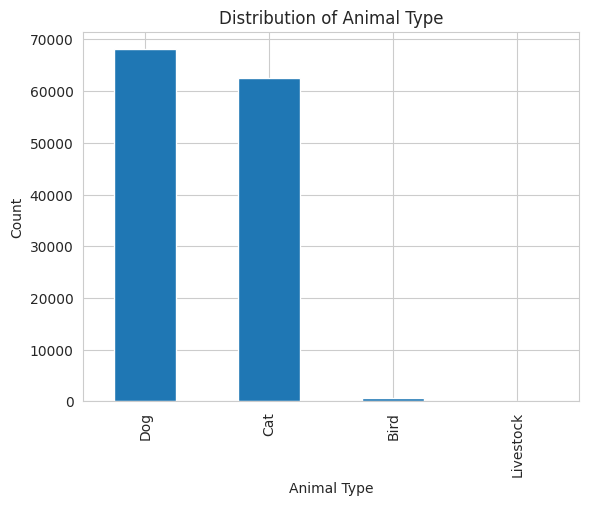

In [768]:
animals['Animal Type'].value_counts().plot(kind='bar')
plt.title("Distribution of Animal Type")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()

In [769]:
# Dogs and cats dominate the dataset with having over 60,000 records each.
# The other animals (birds and livestock) are very rare in comparison.

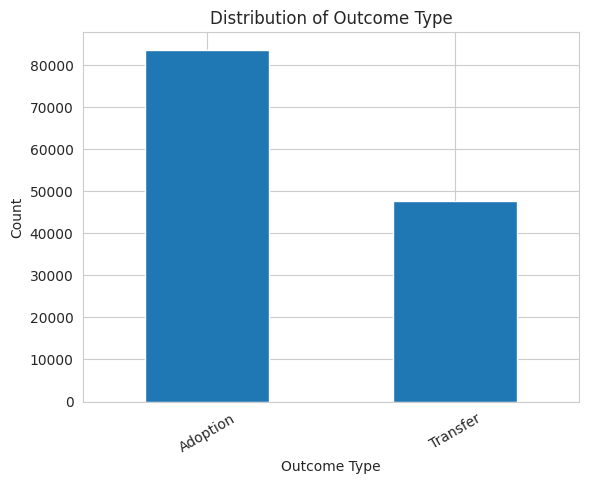

In [770]:
animals['Outcome Type'].value_counts().plot(kind='bar')
plt.title("Distribution of Outcome Type")
plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

In [771]:
# The majority of outcomes are Adoption, followed by Transfer.
# Again other outcomes (Euthanasia, Return to Owner) are much less frequent.

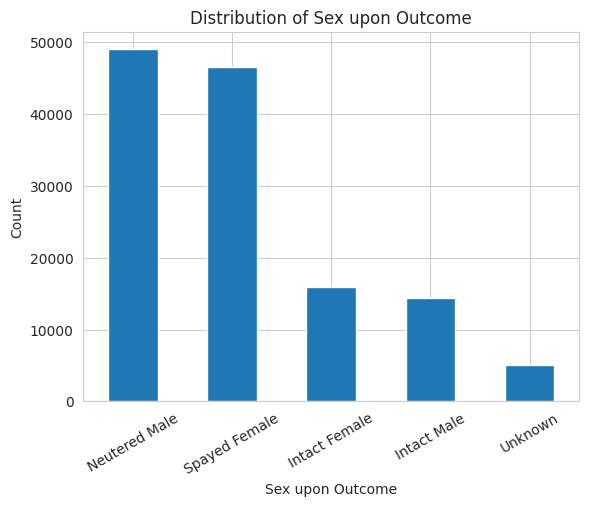

In [772]:
animals['Sex upon Outcome'].value_counts().plot(kind='bar')
plt.title("Distribution of Sex upon Outcome")
plt.xlabel("Sex upon Outcome")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

In [773]:
# The largest categories are Neutered Male and Spayed Female with ~45,000–50,000 animals each.
# Intact animals (male/female) are much less common.
# There are a small number of records are marked as Unknown aswell.

In [774]:
print(animals['Age upon Outcome'].value_counts().head(10))
# The most common age groups are 2 months, 1 year, and 2 years.
# Younger animals (< 1 year) are most prevelant in the dataset, especially “2 months”.
# Because these values are strings we need to convert them into a consistent numeric format (like days) for proper analysis.

Age upon Outcome
2 months    22470
1 year      19870
2 years     18265
3 months     8673
1 month      6521
3 years      6165
4 months     5524
5 months     3739
4 years      3523
6 months     3341
Name: count, dtype: int64


Text(0, 0.5, 'Number of Animals')

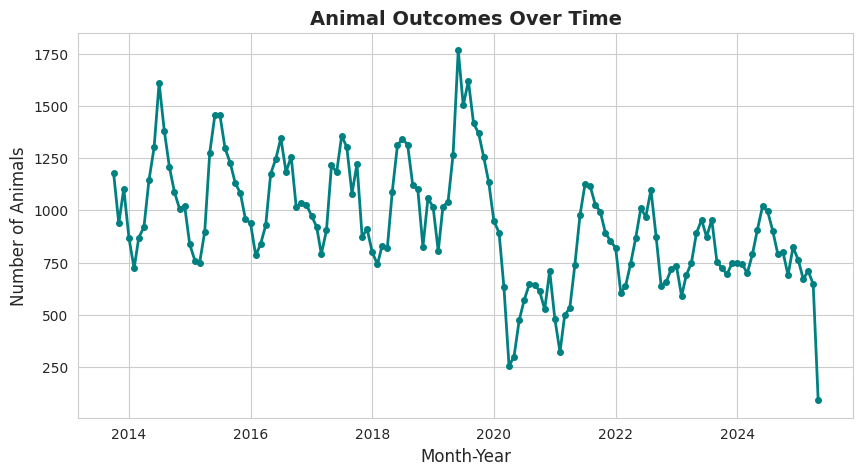

In [775]:
#Animal Outcomes over time
monthly_counts = animals['MonthYear'].value_counts().sort_index()
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(monthly_counts.index, monthly_counts.values, 
        color='teal', linewidth=2, marker='o', markersize=4)
ax.set_title('Animal Outcomes Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Number of Animals', fontsize=12)


Text(0.5, 1.0, 'Top 10 Animal Breeds')

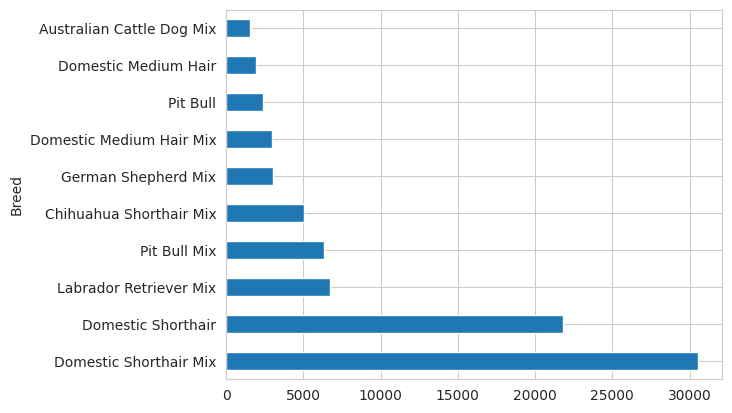

In [776]:
# Top 10 animal breeds
top_breeds = animals['Breed'].value_counts().head(10)
top_breeds.plot(kind='barh')
axes[1,1].set_title('Top 10 Animal Breeds')



Text(0.5, 1.0, 'Top 10 Animal Colors')

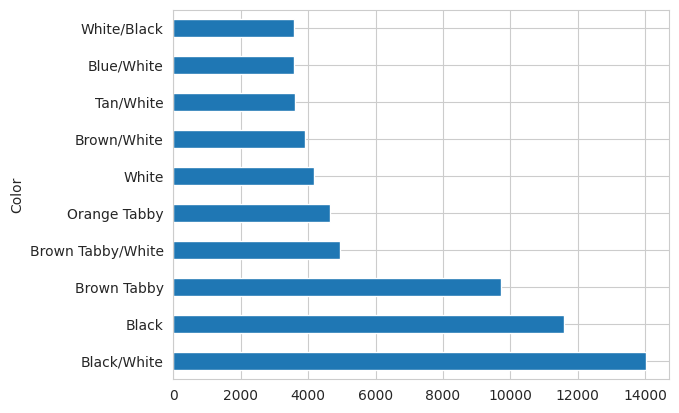

In [778]:
# Top 10 animal colors
top_colors = animals['Color'].value_counts().head(10)
top_colors.plot(kind='barh')
axes[1,1].set_title('Top 10 Animal Colors')

In [779]:
print("Observations taken away from Univariate Analysis:")
print("Distribution of Animal Type:")
print("Dogs and cats dominate the dataset with having over 60,000 records each.")
print("The other animals (birds and livestock) are very rare in comparison.")
print("")

print("Distribution of Outcome Type:")
print("The majority of outcomes are Adoption, followed by Transfer.")
print("Again other outcomes (Euthanasia, Return to Owner) are much less frequent.")
print("")


print("Distribution of Sex upon Outcome:")
print("The largest categories are Neutered Male and Spayed Female with ~45,000–50,000 animals each.")
print("Intact animals (male/female) are much less common.")
print("There are a small number of records are marked as Unknown aswell.")
print("")

print("Animal Outcomes Over Time:")
print("There is a peak in 2019 and after that a large drop it levels out at around 750")
print("")

print("Top 10 Breeds:")
print("Most common color is Domestic Shorthair Mix and Domestic Shorthair byfar")
print("")

print("Top 10 Colors:")
print("Most common color is Black/White closely followed by Black and Brown Tabby")


Observations taken away from Univariate Analysis:
Distribution of Animal Type:
Dogs and cats dominate the dataset with having over 60,000 records each.
The other animals (birds and livestock) are very rare in comparison.

Distribution of Outcome Type:
The majority of outcomes are Adoption, followed by Transfer.
Again other outcomes (Euthanasia, Return to Owner) are much less frequent.

Distribution of Sex upon Outcome:
The largest categories are Neutered Male and Spayed Female with ~45,000–50,000 animals each.
Intact animals (male/female) are much less common.
There are a small number of records are marked as Unknown aswell.

Animal Outcomes Over Time:
There is a peak in 2019 and after that a large drop it levels out at around 750

Top 10 Breeds:
Most common color is Domestic Shorthair Mix and Domestic Shorthair byfar

Top 10 Colors:
Most common color is Black/White closely followed by Black and Brown Tabby


### 5. Drop duplicate rows and irrelevant columns.

In [780]:
# Finding irrelevant columns for prediction
print("Columns:", animals.columns.tolist())
print(f"Shape before removal: {animals.shape}")

# Drop columns that are not useful
drop = [
    'Animal ID',      # Not predictive
    'Date of Birth',  # Redundant Info
    'Name',          # Not predictive
    'DateTime',      # Redundant
    'Outcome Subtype' # Too specific
]
animals = animals.drop(columns=drop)

print(f"Shape after removal: {animals.shape}")

Columns: ['Animal ID', 'Date of Birth', 'Name', 'DateTime', 'MonthYear', 'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome', 'Age upon Outcome', 'Breed', 'Color']
Shape before removal: (131148, 12)
Shape after removal: (131148, 7)


### 6. Convert all data to numeric and/or categorical data types. Hint: Make the Age at Outcome column a float by converting all values to one unit for example days.

In [781]:
# convert age to days
def age_days(age):
    #handle null & missing values
    if pd.isna(age):
        return np.nan
    if age == '':
        return np.nan
    #normalize variable to lower
    age = str(age).lower().strip()
    
    split_age = age.split()
    if len(split_age) < 2:
        return np.nan
        
    try:
        value = float(split_age[0])
        unit = split_age[1]
    except (ValueError, IndexError):
        return np.nan
    if 'day' in unit:
        return value
    elif 'week' in unit:
        return value * 7
    elif 'month' in unit:
        return value * 30.44  
    elif 'year' in unit:
        return value * 365.25
    else:
        return np.nan
            
animals['Age upon Outcome (days)'] = animals['Age upon Outcome'].apply(age_days)
animals = animals.drop('Age upon Outcome', axis=1)

print("New Age statistics after converting to days:")
print(animals['Age upon Outcome (days)'].describe())


New Age statistics after converting to days:
count    131148.000000
mean        576.098854
std         876.705018
min           1.000000
25%          60.880000
50%         243.520000
75%         730.500000
max       10957.500000
Name: Age upon Outcome (days), dtype: float64


### 7. one-hot encoding on categorical variables

In [782]:
target = 'Outcome Type'

categorical_cols = ['Outcome Type','Animal Type',
                    'Sex upon Outcome','Breed','Color']

for col in categorical_cols:
    animals[col] = animals[col].astype('category')


# Cut top 30 breed and Colors as to not have so many columns

filtered = animals['Breed'].value_counts().head(20).index
animals['Breed'] = animals['Breed'].apply(lambda x: x if x in filtered else 'Other')

filtered = animals['Color'].value_counts().head(10).index
animals['Color'] = animals['Color'].apply(lambda x: x if x in filtered else 'Other')




In [783]:
#checking types
animals.info()


<class 'pandas.core.frame.DataFrame'>
Index: 131148 entries, 0 to 131164
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   MonthYear                131148 non-null  datetime64[ns]
 1   Outcome Type             131148 non-null  category      
 2   Animal Type              131148 non-null  category      
 3   Sex upon Outcome         131148 non-null  category      
 4   Breed                    131148 non-null  object        
 5   Color                    131148 non-null  object        
 6   Age upon Outcome (days)  131148 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(1), object(2)
memory usage: 5.4+ MB


In [784]:
print(animals['Outcome Type'].head())


0    Transfer
1    Transfer
2    Transfer
3    Transfer
4    Transfer
Name: Outcome Type, dtype: category
Categories (2, object): ['Adoption', 'Transfer']


In [785]:
animals['Outcome Type'].unique()


['Transfer', 'Adoption']
Categories (2, object): ['Adoption', 'Transfer']

In [786]:
animals['OutcomeType_Adoption'] = (animals['Outcome Type'] == 'Adoption').astype(int)

print(animals[['Outcome Type','OutcomeType_Adoption']].head())

  Outcome Type  OutcomeType_Adoption
0     Transfer                     0
1     Transfer                     0
2     Transfer                     0
3     Transfer                     0
4     Transfer                     0


In [787]:
#one hot encoding the categorical vars
cat_cols = [
    'Animal Type',
    'Sex upon Outcome',
    'Breed',
    'Color']  
dummies = pd.get_dummies(animals[cat_cols], prefix=cat_cols, dtype='int8')
animals = pd.concat([animals.drop(columns=cat_cols), dummies], axis=1)


In [788]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131148 entries, 0 to 131164
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   MonthYear                        131148 non-null  datetime64[ns]
 1   Outcome Type                     131148 non-null  category      
 2   Age upon Outcome (days)          131148 non-null  float64       
 3   OutcomeType_Adoption             131148 non-null  int64         
 4   Animal Type_Bird                 131148 non-null  int8          
 5   Animal Type_Cat                  131148 non-null  int8          
 6   Animal Type_Dog                  131148 non-null  int8          
 7   Animal Type_Livestock            131148 non-null  int8          
 8   Sex upon Outcome_Intact Female   131148 non-null  int8          
 9   Sex upon Outcome_Intact Male     131148 non-null  int8          
 10  Sex upon Outcome_Neutered Male   131148 non-null 

In [789]:
#Part 2
#Dropping breed as noted by the 
drop = [col for col in animals.columns if col.startswith('Breed_')]
animals = animals.drop(columns=drop)



### 1. Split the data into training and test datasets. Make sure your split is reproducible and that it maintains roughly the proportion of each class of dependent variable. 

In [790]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler 
# Some of the code below was generated by ai see [3].
y = animals['Outcome Type']  

# Small numeric/categorical subset for KNN
base_cols = ['Age upon Outcome (days)']  # numeric
keep_prefixes = ['Animal Type_', 'Sex upon Outcome_']  # low-cardinality one-hots only

keep_dummies = [c for c in animals.columns if any(c.startswith(p) for p in keep_prefixes)]

# Exclude columns that give away the target or are non-numeric/huge
leak_or_unused = ['Outcome Type', 'OutcomeType_Adoption', 
                  'DateTime', 'Date of Birth', 'MonthYear'] 

X = animals[base_cols + keep_dummies].copy()
X = X.loc[:, ~X.columns.isin(leak_or_unused)]

X = X.astype(np.float32)

Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy.drop(columns=[y.name])
y = Xy[y.name]

# stratified split (keep your params if you like)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=1
)

# scale the continuous column 
scaler = StandardScaler()
X_train = X_train.copy()
X_test  = X_test.copy()

col = 'Age upon Outcome (days)'
X_train.loc[:, col] = scaler.fit_transform(X_train[[col]])
X_test.loc[:,  col] = scaler.transform(X_test[[col]])

### 2. K-Nearest Neighbor Classifier

KNN (k=5) classification report:
              precision    recall  f1-score   support

    Adoption     0.8454    0.8875    0.8659     25086
    Transfer     0.7830    0.7145    0.7472     14259

    accuracy                         0.8248     39345
   macro avg     0.8142    0.8010    0.8066     39345
weighted avg     0.8228    0.8248    0.8229     39345

Accuracy (test): 0.8247807853602745
Accuracy (train): 0.8203871333180833


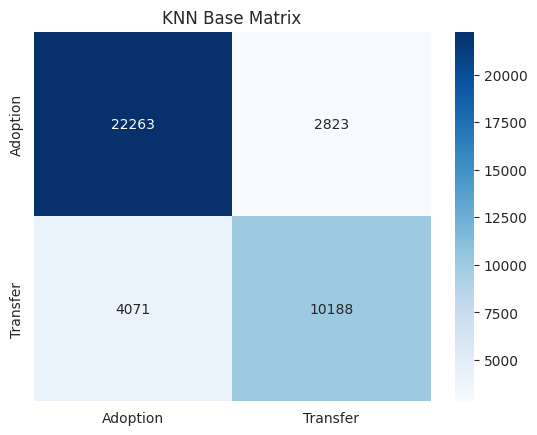

In [791]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Some of the code below was generated by AI; see [4].

#KNN baseline
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

y_pred_knn_base = knn.predict(X_test)

print("KNN (k=5) classification report:")
print(classification_report(y_test, y_pred_knn_base, digits=4))
print("Accuracy (test):", accuracy_score(y_test, y_pred_knn_base))
print("Accuracy (train):", accuracy_score(y_train, knn.predict(X_train)))


# Confusion Matrix Visualization
cm_knn_base = confusion_matrix(y_test, y_pred_knn_base)
plt.title('KNN Base Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(cm_knn_base, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Adoption', 'Transfer'], 
            yticklabels=['Adoption', 'Transfer'])

plt.show()


### 3. K-Nearest Neighbor Classifier using Grid search CV 

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best k: {'n_neighbors': 14}

KNN (GridSearchCV) classification report:
              precision    recall  f1-score   support

    Adoption     0.8479    0.9269    0.8856     25086
    Transfer     0.8461    0.7074    0.7706     14259

    accuracy                         0.8473     39345
   macro avg     0.8470    0.8171    0.8281     39345
weighted avg     0.8472    0.8473    0.8439     39345

Accuracy (test): 0.847324945990596
Accuracy (train): 0.8456913172772131


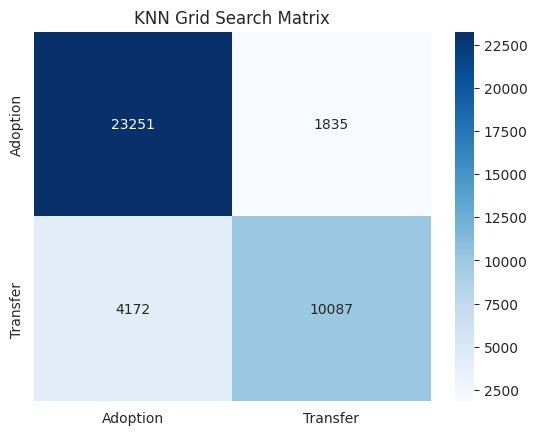

In [792]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
# Some of the code below was generated by AI; see [1] 


# like we did in class
param_grid = {"n_neighbors": np.arange(1, 15)} #reduced to 14 to make it run in a reasonable time
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy", n_jobs=-1,verbose=1)
knn_gs.fit(X_train, y_train)

print("Best k:", knn_gs.best_params_)
best_knn_grid = knn_gs.best_estimator_

y_pred_best_grid = best_knn_grid.predict(X_test)
print("\nKNN (GridSearchCV) classification report:")

print(classification_report(y_test, y_pred_best_grid, digits=4))

print("Accuracy (test):", accuracy_score(y_test, y_pred_best_grid))
print("Accuracy (train):", accuracy_score(y_train, best_knn_grid.predict(X_train)))

cm_knn_grid = confusion_matrix(y_test, y_pred_best_grid)
plt.title('KNN Grid Search Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(cm_knn_grid, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Adoption', 'Transfer'], 
            yticklabels=['Adoption', 'Transfer']) 

plt.show()

### 4. Linear Classification

Accuracy: 0.8576

Perceptron classification report:
              precision    recall  f1-score   support

    Adoption     0.8377    0.9634    0.8961     25086
    Transfer     0.9125    0.6715    0.7737     14259

    accuracy                         0.8576     39345
   macro avg     0.8751    0.8175    0.8349     39345
weighted avg     0.8648    0.8576    0.8518     39345



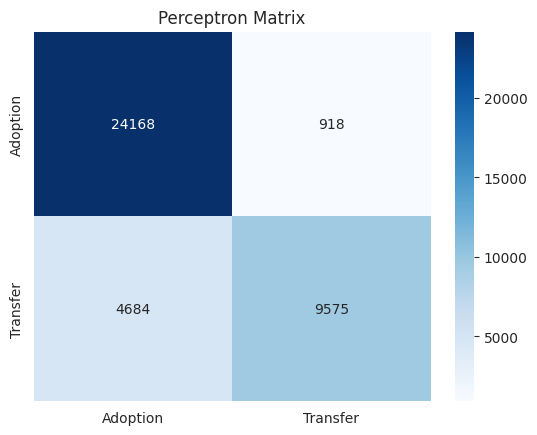

In [793]:
from sklearn.linear_model import Perceptron


# Perceptron (linear classifier)
perc = Perceptron(max_iter=1000, tol=1e-3, random_state=42, class_weight='balanced')
perc.fit(X_train, y_train)

y_pred_perc = perc.predict(X_test)

accuracy_perc = accuracy_score(y_test, y_pred_perc)
print(f"Accuracy: {accuracy_perc:.4f}")

print("\nPerceptron classification report:")
print(classification_report(y_test, y_pred_perc, digits=4))
cm_knn_perc = confusion_matrix(y_test, y_pred_perc)
plt.title('Perceptron Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(cm_knn_perc, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Adoption', 'Transfer'], 
            yticklabels=['Adoption', 'Transfer']) 

plt.show()

### 5. Print report showing accuracy, recall, precision and f1-score for each classification model.

In [794]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Some of the code below was generated by AI; see [5].


def row(name, yhat):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, yhat),
        "Precision (macro)": precision_score(y_test, yhat, average='macro', zero_division=0),
        "Recall (macro)": recall_score(y_test, yhat, average='macro', zero_division=0),
        "F1 (macro)": f1_score(y_test, yhat, average='macro', zero_division=0),
    }

results_df = pd.DataFrame([
    row("KNN (k=5)", y_pred_knn_base),
    row(f"KNN (Grid Search k={knn_gs.best_params_['n_neighbors']})", y_pred_best_grid),
    row("Perceptron", y_pred_perc),
])

print(results_df.round(4))
cols = ["Accuracy", "Precision (macro)", "Recall (macro)", "F1 (macro)"]

top = {c: results_df.loc[results_df[c].idxmax(), ["Model", c]] for c in cols}
for c in cols:
    print(f"- Best {c}: {top[m]['Model']} ({top[c][c]:.4f})")


                    Model  Accuracy  Precision (macro)  Recall (macro)  \
0               KNN (k=5)    0.8248             0.8142          0.8010   
1  KNN (Grid Search k=14)    0.8473             0.8470          0.8171   
2              Perceptron    0.8576             0.8751          0.8175   

   F1 (macro)  
0      0.8066  
1      0.8281  
2      0.8349  
- Best Accuracy: Perceptron (0.8576)
- Best Precision (macro): Perceptron (0.8751)
- Best Recall (macro): Perceptron (0.8175)
- Best F1 (macro): Perceptron (0.8349)
